### Homework 1 - Question 1 - Luke Arend

### a)

The component of $\vec{v}$ lying along $\hat{u}$ has a length equal to their dot product $\hat{u} \cdot \vec{v}$ and points in direction $\hat{u}$.

In [1]:
def projection(u_hat, v):
    return u_hat * np.dot(u_hat, v)

### b)

Since $\vec{v}$ can be decomposed into a component along $\hat{u}$ and a component orthogonal to $\hat{u}$, subtracting the component of $\vec{v}$ along $\hat{u}$ from $\vec{v}$ gives the orthogonal component.

In [2]:
def ortho(u_hat, v):
    return v - projection(u_hat, v)

### c)

The distance from $\vec{v}$ to the component that lies along direction $\hat{u}$ is the length of the component of $\vec{v}$ orthogonal to $\hat{u}$.

In [3]:
def norm(v):
    return np.sqrt(np.dot(v, v))

def distance(u_hat, v):
    return norm(ortho(u_hat, v))

### Verify in 2 dimensions

Now we verify the code by testing it on random vectors. First we define a function which samples a random vector with dimensionality $N$.

In [4]:
import numpy as np

In [5]:
def randvec(N):
    return np.random.randn(N)

We also define a function which scales a vector to unit length.

In [6]:
def unit(v):
    return v / norm(v)

We verify visually with 2-dimensional vectors by plotting $\hat{u}$, $\vec{v}$ and the two components described in (a) and (b) for several random draws.

In [7]:
from matplotlib import pyplot as plt

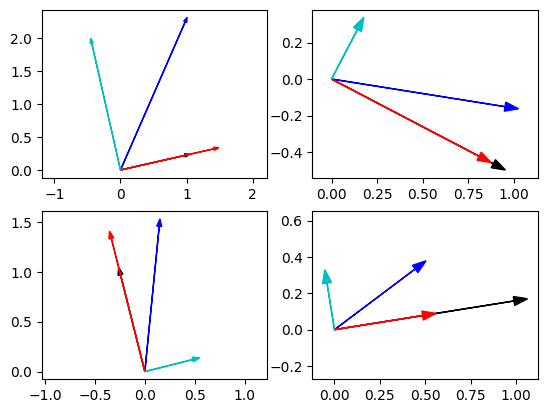

In [8]:
def visual_test_2d(ax):
    # Draw random vectors
    u_hat = unit(randvec(2))
    v = randvec(2)
    
    # Compute projection
    v_proj = projection(u_hat, v)
    v_ortho = ortho(u_hat, v)

    # Plot vectors and projections
    origin = [0, 0]
    ax.arrow(*origin, *u_hat, head_width=0.05, color='k')   # black: u_hat
    ax.arrow(*origin, *v, head_width=0.05, color='b')       # blue: v
    ax.arrow(*origin, *v_proj, head_width=0.05, color='r')  # red: v_proj
    ax.arrow(*origin, *v_ortho, head_width=0.05, color='c') # cyan: v_ortho

    ax.axis('equal')

np.random.seed(0)

fig, axes = plt.subplots(2, 2)
for ax in axes.flat:
    visual_test_2d(ax)

plt.show()

### Verify in N dimensions

If a vector $\vec{a}$ points in the same direction as $\hat{u}$, then its projection along $\hat{u}$ equals $\vec{a}$ itself.

In [9]:
def parallel_ok(u_hat, v):
    a = projection(u_hat, v)
    return np.allclose(a, projection(u_hat, a))

If a vector $\vec{b}$ is orthogonal to $\hat{u}$, then its projection along $\hat{u}$ has length 0.

In [10]:
def orthogonal_ok(u_hat, v):
    b = ortho(u_hat, v)
    return np.allclose(0, norm(projection(u_hat, b)))

If $\vec{a}$ and $\vec{b}$ are the components of $\vec{v}$ parallel and orthogonal to $\hat{u}$, then $\vec{a}$ and $\vec{b}$ sum to $\vec{v}$.

In [11]:
def sum_ok(u_hat, v):
    a = projection(u_hat, v)
    b = ortho(u_hat, v)
    return np.allclose(v, a + b)

If $\vec{a}$ and $\vec{b}$ are the components of $\vec{v}$ parallel and orthogonal to $\hat{u}$, then the sum of their squared lengths is equal to the squared length of $\vec{v}$.

In [12]:
def lengths_ok(u_hat, v):
    a = projection(u_hat, v)
    b = ortho(u_hat, v)
    return np.allclose(norm(v)**2, norm(a)**2 + norm(b)**2)

In [13]:
def all_ok(u_hat, v):
    cond1 = parallel_ok(u_hat, v)
    cond2 = orthogonal_ok(u_hat, v)
    cond3 = sum_ok(u_hat, v)
    cond4 = lengths_ok(u_hat, v)
    return np.all([cond1, cond2, cond3, cond4])

Verify for some random vectors with higher dimensionality.

In [14]:
for N in [0, 1, 2, 3, 4, 10, 100, 1000]:
    u_hat = unit(randvec(N))
    v = randvec(N)
    ok = all_ok(u_hat, v)
    print(f"N = {N}: {'ok' if ok else 'failed'}")

N = 0: ok
N = 1: ok
N = 2: ok
N = 3: ok
N = 4: ok
N = 10: ok
N = 100: ok
N = 1000: ok
